<a href="https://colab.research.google.com/github/philliewright/Hatespeech_CW2/blob/main/hatespeech_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Investigating cyberbullying in the form of hatespeech on Social Media </h1>
<h2 align="center">  </h2>

**Trigger Warning:** Due to the nature of the comments there is offensive language included in this report.

## Contents
1. Aims, objectives and background
    - 1.1 Aims and Objectives
    - 1.2 Project Proposal Overview
    - 1.3 Literature Review
2. Methods
    - 2.1 Preprocessing
    - 2.2 Topic Modelling
    - 2.3 Sentiment Analysis
    - 2.4 Combining Topic Modelling and Sentiment Analysis
3. Imports
4. Data Loading
5. Preprocessing
    - 5.1 Handle Missing Values
    - 5.2 Tokenize
    - 5.3 Lemmatize
    - 5.4 Remove URL and numbers
6. Feature Extraction & LDA   
    - 6.1 Bag of Words and TFIDF Counts of common words
    - 6.2 LDA using Bag of words
    - 6.3 LDA using TFIDF
    - 6.4 Visualisations
    - 6.5 Assign Topics
    - 6.6 Coherence and Perplexity for LDA
7. Perform NMF for topics 2 to 21
    - 7.1 Coherence Comparison NMF, LDA BoW, LDA TF-IDF
    - 7.2 NMF Visualisation
    - 7.3 Experimenting with bigrams and trigrams using NMF
8. Sentiment Analysis
    - 8.1 Visualising sentiment analysis distributions of all_data and hatespeech data
9. Combining and Visualising Topics with Sentiments
    - 9.1 Mapping topic numbers and descriptions decided on
    - 9.2 Distribution of sentiments within all data topics
    - 9.3 Distribution of sentiments for hate speech labeled comments
    - 9.4 Plot for average sentiment per topic first for all data, then hate speech topics
    - 9.5 Distributions of sentiments per hate speech topics
10. Summary and Conclusion
11. References

# 1. Aims, Objectives and Backgorund
## 1.1 Aims and Objectives
#### Aims
1. To investigate the prevalence and patterns of hate speech in online comments.
2. To analyse the sentiment and topics that are commonly associated with hate speech.

#### Objectives
- **Simple**: To understand the sentiment and topics prevalent in hatespeech online
- **Measurable**: To quantify the sentiment and topics of the hate speech vs non hatespeech
- **Achievable**: To use pretrained NLP techniques like sentiment analysis and topic modeling
- **Realistic**: To provide insights that are actionable for online platforms
- **Timescaled**: To complete the analysis and report between 21 July and 17 Sept 2023.

For this Coursework, I am splitting the coursework into 3 sections; Topic Modelling, Sentiment Analysis and a combination of both with the overarching aim of producing some actionable insights to facilitate combatting hatespeech online.

For the initial Topic Modelling, I am aiming to gain deeper insights into the comments' themes and if it is possible to draw out conclusions of which topics may induce hateful language. I hope to extract some primary themes in the data and use key word extractions to understand the frequenly mention terms in these themes. I will experiment categorising the data into 2 to 10 discernable Topics using visualisation tools made for representing topic modelling data. I will attempt to apply two advanced NLP techniques; Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF) to model topics. I will then compare these models using metrics such as choerance score to choose the best model to proceed with. With packages avaliable to help clean, tokenise and lemmatize the data, it should be possible to complete this work in the initial 2.5 week period.

The Second aim is to evaluate sentiments within the comments to assess the general sentiment towards each theme and perhaps evaluate if hatespeech is always used to purposely cause harm. We will classify each comment as positive, neutral or negative and visualise the distributions across the dataset. We will use pretrained tool VADER to do this which specialise in extracting sentiments from text docuemnts, ensuring we tune the models to best suit our data. Sentiment analysis tools such as VADER are widely used and advanced so it is achievable to complete this in 1 week. I will ensure to examine a subset of comments to ensure the validity of the analysis.

The final aim is to combine the Topic Modelling with the sentiment analysis. I will do this on the Topics found for comments labelled as both including hatespeech and not (i.e. all the data) in order to evaluate the predominate sentiment towards that theme across the data. For example, how much of a given topic has comments with hatespeech, how much of a given topic have negative comments and what is the overlap? To do this I will quantify sentiment scores for each topic, ensuring clear visibility of which topics invoke positive, negative, or neutral reactions and visualising these using heatmaps. I will attempt to combine insights from the individual analyses of topics and sentiments for a holistic understanding for example whether negative sentiments cluster around specific topics. I will allocate a further 2 weeks for this section with the overall analysis hoping to be done over a 7.5 week period. (21 July to 17 September 2023)

### 1.2 Project Proposal Overview

In coursework 1, I proposed a variety of projects which could be conducted using this data. The proposal aimed to provide an indepth analysis of the markers of hatespeech and the prevalence online. It used pre labelled data, which now in this project we assume to be accurately labelled, to categorise the comments into 'hatespeech' and not hatespeech. These labels are the focus of the report as they are used to try and uncover patterns, keywords and phrases associated with hateful language. A comparison with the scraped hatebase.org library of hatespeech terms showed that, although many comments were labeled as 'hateful', only about 30% of them actually contained recognised hate speech terms. This highlighted the complex nature of online hate speech, suggesting that its detection might not solely hinge on specific terms but could also be influenced by context or specific word combinations. To further investigate we looked at bigrams to test the hypothesis that combinations of words, rather than isolated terms, were responsible for the 'hatefulness' of the comments. It was shown that the true nature of hate speech could be deeply embedded in context, sentiment, and phraseology and therefore this project will explore the context (topics) and sentiments of these comments.

The primary objective of this project remains consistent, i.e. to develop a deeper understanding of hate speech online and explore methods to mitigate its impact. Now we have a better understanding of the nature of hatespeech online,we can see that it its not as simple as looking for key words and knowing the context and sentiment of the comments is key in understanding the offensive nature of a comment. Therefore after coursework 1, we decided to focus on he questions of do certain topics naturally elicit more hateful language? And, does the sentiment of the comment align with the presence of hate speech terms? By combining hatespeech detection with topic/ sentiment analysis, I aim to provide a more comprehensive approach to understanding hateful commenting. While hatespeech detection identifies potentially harmful comments, topic sentiment analysis helps uncover the broader narratives and emotions driving these comments.

### 1.3 Literature Review
#### LDA and NMF in Topic Modeling

A previous study from 2003 introduced Latent Dirichlet Allocation (LDA) as a generative probabilistic model for analysing text data [1]. LDA has been widely used in topic modeling to discover the underlying topics in large voljumes of text. In a 2011 study, LDA was used to analyse Twitter data in comparison to traditional news sources [6]. They decided that as Tweets were short, they could aggregate the Tweets into one document. They rejected this idea however, as tweets are usually about one topic they employed their own Twitter LDA vesion using the Bernoulli disttibution.

Non-negative Matrix Factorization (NMF) was introduced in 1999 and has also been a popular choice for topic modelling [4]. A study by Greene, O'Callaghan, and Cunningham in 2014 compared LDA to NMF. NMF was found to be more interpretable compared to LDA, especially in the context of short text analysis. However, they pointed out that NMF often requires a larger dataset to perform optimally. [2]

#### VADER in Sentiment Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) was introduced in 2014 [3]. It is a lexicon and rule-based sentiment analysis tool which is known for being good for sentiments in social media posts. It is a simple and effective way to analyse social media texts. In a 2016 study, VADER was used to analyze the sentiment of tweets, and it was praised for its ability to accurately determine the sentiment of short texts [5]. However, the authors did note that VADER might struggle with sarcastic or ironic statements, which can be prevalent in social media texts.

### Critical Analysis

While LDA and NMF have been very useful at uncovering hidden topics in text data, they both have limitations. Determining the optimal number of topics is a significant challenge in LDA, and it often requires a trial-and-error approach[6]. NMF's requirement for a larger dataset can be limiting, especially when dealing with niche topics or smaller texts e.g. social media texts[2].

VADER, despite its effectiveness in analyzing short texts, has been criticised for its inability to accurately analyse data with sarcasm or irony, which may be present alot in out data as our sources are all social media comments [5]. It also relies heavily on a predefined lexicon, which may not be comprehensive enough to cover the fast evolving language used in online platforms.

The literature shows there are significant caveats and limitations for LDA, NMF, and VADER in topic modeling and sentiment analysis. We have decided to use VADER as we belive it is still the most effective for the type of data we are using. We are going to trial and compare both topic modelling methods.



## 2 Methods
### 2.1 Text Preprocessing
In order to carry out the topic modelling and sentiment analysis, it is important to process the text to be efficient and readable to the models. We have included 3 main steps in our pre processing; cleaning, lemmatisation and tokenisation.

**Cleaning** the text involved making all the text lower caase so that all the comments were consistent. We also removed special charachters and URLs from the text. This is an important step to remove noise from the data.

**Tokenisation** was used to generate a 'vocabulary' of words so we can do TF-IDF analysis and understand word frequency and importances within the corpus.

**Lemmatisation** is where the word is reduced down to its base form, for example loving would become love. This reduces dimentionality of the data as there are less words total while keeping the general meaning. In tern this will improve performance and efficiency of the models.


### 2.2 Topic Modelling
Topic modelling is a form of unsupervised learning that helps in discovering the abstract topics present in a corpus. In this project, two popular algorithms are used for topic modelling: Latent Dirichlet Allocation (LDA) and Non-negative Matrix Factorization (NMF).

The choice of LDA and NMF was motivated by their distinct advantages and the nuances they bring to topic modelling.

**LDA (Latent Dirichlet Allocation)**

LDA is a generative probabilistic model that assumes each document is a mixture of topics and a topic is a mixture of words. This is especially useful in dealing with large and complex datasets where the underlying topics are not immediately obvious.

Comparison with other tools: Compared to other topic modeling algorithms, LDA is more interpretable and can easily handle new unseen documents.

**NMF (Non-negative Matrix Factorization)**

NMF is based on linear algebra. It factorises the given document-term matrix into two lower dimensional matrices, providing a more deterministic approach to topic modelling. NMF is often faster and offers a more straightforward interpretation of topics, making it ideal for datasets where clarity and speed are essential. Given this topic aims to use social media data which could be in extremely large quantities, this approach was also considered.

Comparison with other tools: When compared to LDA, NMF often provides more human-interpretable topics. It is also faster than LDA, making it a better choice for larger datasets.

**Differences and Expectations**

While both algorithms serve the purpose of topic modelling, they do so in fundamentally different ways, leading to distinct sets of topics.

1. **Interpretability**: NMF generally provides topics that are easier to interpret compared to LDA.
2. **Speed**: NMF is usually faster, making it more suitable for larger datasets
3. **Topic Overlap**: LDA allows words to be shared across multiple topics, providing a more nuanced understanding
4. **Deterministic vs Probabilistic**: NMF is deterministic, whereas LDA is probabilistic, affecting how the topics evolve during multiple runs of the algorithms.

Using both LDA and NMF provides a comprehensive view of the possible topics within the dataset. By comparing their results, we can achieve a more nuanced understanding of the underlying themes in the corpus.

We will use the topic modelling to investigate if there are any overarching topics which spur the use of hatespeech and could this be used to predict hateful behaviour online?


### 2.3 Sentiment Analysis

The choice of using VADER (Valence Aware Dictionary and sEntiment Reasoner) for sentiment analysis was motivated by several factors. Firstly VADER is lexicon and rule-based, so it doesn't require any training data. Considering that the project's dataset is diverse and not labeled for sentiment, this is a significant advantage.

Secondly, VADER is specifically designed for analysing social media text, which makes it perfect for our data. It understands the use of slang, emojis therefore providing a more accurate sentiment score. Unlike other sentiment analysis tools that only understand basic positive or negative words, VADER also comprehends the intensity of emotion by considering capitalization and punctuation marks. As VADER not only aligns well with the objectives of this project but also complements the nature of the dataset, it is the logical choice for sentiment analysis.

Comparison with other tools: Compared to machine learning approaches, VADER is pre trained and can handle a wide range of texts. It considers the polarity of words along with "booster' words, emojis, and slang, providing a more accurate sentiment score.

The Sentiment analysis will be used to answer the question - is hatespeech ever accidental? If so what applications could this have?

### 2.4 Combining Topic Modelling and Sentiment Analysis

One of the innovative aspects of this project is the fusion of topic modelling and sentiment analysis. By combining these two powerful techniques, we can further explore the dataset to answer more complex questions.

Topic modelling provides us with a viewof the main themes present in the comments, while sentiment analysis gives us an insight into the emotional tone of each document. When used together, these techniques enable us to analyse not just *what* topics are being discussed, but also *how* they are being discussed.

With this we could answer thw following questions:
1. **Emotional Context**: How do sentiments vary across different topics? And are some topics more prone to evoke negative emotions and therefore more likely to contain hate speech?
2. **Sentimental Drivers**: What are the key topics that drive positive or negative sentiments in the dataset? Can we identify triggers for hate speech based on this?
3. **Accidental Hate Speech**: Is hate speech in some topics more accidental than in others? Knowing this could help in designing automated moderation tools that are more context-aware.

We will us the better performing of the LDA and NMF for topic modelling and VADER for sentiment analysis. After deriving topics and sentiments, we will map them onto each document to create a multi-dimensional analysis. This will be followed by statistical tests to validate any observed patterns.


By offering this holistic approach, we aim to provide actionable insights that could be used for online moderation and policy formulation.


# 3 Imports

Here we are importing the necessary libraries to perform our analysis

##test

In [ ]:
# Uncommmentthis to install necessary packages if not already installed!
#import os

#def install_packages():
#    packages = [
#        "pandas",
#        "nltk",
#        "scikit-learn",
#        "pyLDAvis",
#        "numpy",
#        "gensim",
#        "matplotlib",
#        "wordcloud",
#        "seaborn",
#    ]
#    for package in packages:
#        os.system(f"pip install {package}")
#
#install_packages()


In [ ]:
# loading neccesary libraries
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('wordnet')
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation, NMF
import pyLDAvis
import numpy as np
import time
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/pwrightwork/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 4 Data Loading


In [ ]:
#Loading in data, with error checking incase the file isn t in the specified folder
def load_csv(file_path):
    try:
        data = pd.read_csv(file_path)
        if data.empty:
            raise ValueError("The CSV file is empty")
        return data
    except FileNotFoundError:
        raise FileNotFoundError("The specified file does not exist")
    except Exception as e:
        raise Exception(f"An unknown error occurred: {e}")

In [ ]:
all_data = load_csv('./output_all_data.csv')
all_data.head()

,Text,oh_label,Dataset,clean_text
0,I give permission for Wikipedia to use the ...,0.0,aggression_parsed_dataset_subset.csv,give permission Wikipedia use material Nancy S...
1,` October 2010 (UTC) :::::It does look that wa...,0.0,toxicity_parsed_dataset_subset.csv,October 2010 UTC look way merger sounds like C...
2,RT @dcm81: #killerblondes ?? Have the producer...,0.0,twitter_parsed_dataset_subset.csv,RT dcm81 killerblondes producers lost plot eye...
3,@ShaofHappiness COME SAY HI TO ME THIS EVENING...,0.0,twitter_parsed_dataset_subset.csv,ShaofHappiness COME SAY HI EVENING ILU
4,"@ManhattaKnight I mean he's gay, but he uses g...",1.0,cyberbullying_tweets_subset.csv,ManhattaKnight mean hes gay uses gendered slur...


In [ ]:
print("Shape of the data: ", all_data.shape) #inspecting the shape of the data


Shape of the data:  (14490, 4)


# 5 Data Preprocessing
## 5.1 Handling Missing Values

As there were only 8 rows of missing values, we decided totdrop those rows.

In [ ]:
def report_missing_values(data):
    """ Checks for missing values"""
    missing_values = data.isnull().sum()
    print("Missing values in each column:")
    for column, missing_value_count in missing_values.items():
        print(f"{column}: {missing_value_count}")


In [ ]:
missing_values = report_missing_values(all_data)

Missing values in each column:
Text: 0
oh_label: 0
Dataset: 0
clean_text: 8


In [ ]:
# As only 8 missing values, dropping these rows
all_data.dropna(subset=['clean_text'], inplace=True)

# Verifying if missing values have been removed
if all_data['clean_text'].isnull().sum() == 0:
    print("Successfully removed rows with missing 'clean_text'.")

Successfully removed rows with missing 'clean_text'.


In [ ]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(all_data.describe())


Descriptive Statistics:
           oh_label
count  14482.000000
mean       0.257975
std        0.437536
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


## 5.2 Tokenise the clean_text column
First we are going to tokenise the words and then count them

In [ ]:
def tokenise_text(data):
    """
    Tokenise the text in the clean_text column
    """
    try:
        # label changed to a float when I imported it, so changing it back
        data['oh_label'] = data['oh_label'].astype(int)
        data['clean_text'] = data['clean_text'].astype(str)

        # Begin by tokenizing the words
        # also lowercase all words for consistency
        data['tokens'] = data['clean_text'].apply(lambda x: [word.lower() for word in x.split()]) #ensures all text is lowercase
        print("Tokenisation successful")
        return data
    except Exception as e:
        print(f"Tokenisation error: {e}")
        return None




In [ ]:
# Usage:
all_data = tokenise_text(all_data)
all_data.head()

Tokenisation successful


,Text,oh_label,Dataset,clean_text,tokens
0,I give permission for Wikipedia to use the ...,0,aggression_parsed_dataset_subset.csv,give permission Wikipedia use material Nancy S...,"[give, permission, wikipedia, use, material, n..."
1,` October 2010 (UTC) :::::It does look that wa...,0,toxicity_parsed_dataset_subset.csv,October 2010 UTC look way merger sounds like C...,"[october, 2010, utc, look, way, merger, sounds..."
2,RT @dcm81: #killerblondes ?? Have the producer...,0,twitter_parsed_dataset_subset.csv,RT dcm81 killerblondes producers lost plot eye...,"[rt, dcm81, killerblondes, producers, lost, pl..."
3,@ShaofHappiness COME SAY HI TO ME THIS EVENING...,0,twitter_parsed_dataset_subset.csv,ShaofHappiness COME SAY HI EVENING ILU,"[shaofhappiness, come, say, hi, evening, ilu]"
4,"@ManhattaKnight I mean he's gay, but he uses g...",1,cyberbullying_tweets_subset.csv,ManhattaKnight mean hes gay uses gendered slur...,"[manhattaknight, mean, hes, gay, uses, gendere..."


# 5.3 Lemmatize

We decided to lemmatise the words, instead of stemming them, as lemmatisation considers the structure and grammatical properties of the words and converts them to a base form wheras stemming jsut chops of the end of the word based on an algorith. This can result in stems which arent actualy real words. Therefore lemmatisation is better for topic modelling as it keeps the words semantic meaning. However computationally, it is more expensive.

In [ ]:
def lemmatize_text(data):
    """
    Lemmatises the tesxt data
    """
    try:
        lemm = WordNetLemmatizer() #using the inbuilt lemmatisation function

    # Lemmatize all words
        data['lemmatized'] = data['tokens'].apply(lambda x: [lemm.lemmatize(word) for word in x])
        print("Lemmatisation successful")
        return data
    except Exception as e:
        print(f"An error occurred during lemmatisation: {e}")
        return None

In [ ]:
all_data = lemmatize_text(all_data)
all_data.head()

# can see that the words have been succesfully spliy into tokens and lemmatised e.g. 'sounds' became 'sound'

Lemmatisation successful


,Text,oh_label,Dataset,clean_text,tokens,lemmatized
0,I give permission for Wikipedia to use the ...,0,aggression_parsed_dataset_subset.csv,give permission Wikipedia use material Nancy S...,"[give, permission, wikipedia, use, material, n...","[give, permission, wikipedia, use, material, n..."
1,` October 2010 (UTC) :::::It does look that wa...,0,toxicity_parsed_dataset_subset.csv,October 2010 UTC look way merger sounds like C...,"[october, 2010, utc, look, way, merger, sounds...","[october, 2010, utc, look, way, merger, sound,..."
2,RT @dcm81: #killerblondes ?? Have the producer...,0,twitter_parsed_dataset_subset.csv,RT dcm81 killerblondes producers lost plot eye...,"[rt, dcm81, killerblondes, producers, lost, pl...","[rt, dcm81, killerblondes, producer, lost, plo..."
3,@ShaofHappiness COME SAY HI TO ME THIS EVENING...,0,twitter_parsed_dataset_subset.csv,ShaofHappiness COME SAY HI EVENING ILU,"[shaofhappiness, come, say, hi, evening, ilu]","[shaofhappiness, come, say, hi, evening, ilu]"
4,"@ManhattaKnight I mean he's gay, but he uses g...",1,cyberbullying_tweets_subset.csv,ManhattaKnight mean hes gay uses gendered slur...,"[manhattaknight, mean, hes, gay, uses, gendere...","[manhattaknight, mean, he, gay, us, gendered, ..."


 We then had a quixk look at the Word Frequency analysis to check the outputs made sense

In [ ]:
def word_frequency_analysis(data):
    """
    calculates the most common words in the data
    """
    words_1 = data[data.oh_label == 1]['lemmatized']
    words_0 = data[data.oh_label == 0]['lemmatized']

    _1_words = Counter(word for words in words_1 for word in str(words).split())
    _0_words = Counter(word for words in words_0 for word in str(words).split())

    print("Most common words for oh_label = 1:")
    print(_1_words.most_common(50))

    print("Most common words for oh_label = 0:")
    print(_0_words.most_common(50))


In [ ]:
word_frequency_analysis(all_data)

Most common words for oh_label = 1:
[("'die',", 2535), ("'fag',", 2517), ("'penis',", 1682), ("'fat',", 1306), ("'jew',", 1282), ("'suck',", 1036), ("'like',", 590), ("'fuck',", 568), ("'dick',", 540), ("'homo',", 489), ("'sexual',", 488), ("'people',", 438), ("'school',", 434), ("'u',", 419), ("'ban',", 399), ("'mother',", 396), ("'im',", 390), ("'dont',", 380), ("'fucking',", 350), ("'get',", 337), ("'as',", 334), ("'one',", 325), ("'going',", 310), ("['rt',", 308), ("'know',", 302), ("'want',", 300), ("'page',", 296), ("'muslim',", 290), ("'girl',", 288), ("'kill',", 274), ("'joke',", 264), ("'gay',", 253), ("'high',", 252), ("'dumb',", 251), ("'bitch',", 243), ("'pussy',", 232), ("'woman',", 223), ("'go',", 221), ("'think',", 220), ("'rape',", 218), ("'bully',", 218), ("'fucker',", 218), ("'bullied',", 217), ("'hate',", 216), ("'would',", 213), ("'wikipedia',", 201), ("'make',", 196), ("'talk',", 194), ("'nigger',", 192), ("'say',", 187)]
Most common words for oh_label = 0:
[("'art

## 5.4 Remove URL and numbers

Next we removed urls and numbers from the text as they wont add meaning to our topics/sentiment analysis and will just be noise.

In [ ]:
# Function to remove numbers from a list of words
def remove_numbers(word_list):
    """
    removees any numbers from the text
    """
    return [word for word in word_list if not bool(re.search(r'\d', word))]

all_data['lemmatized_no_numbers'] = all_data['lemmatized'].apply(remove_numbers)



# Function to remove URLs from a list of words
def remove_urls(word_list):
    """
    Removes any URLs from the text
    """
    return [word for word in word_list if not (word.startswith('http') or word.startswith('www'))]

all_data['lemmatized_clean'] = all_data['lemmatized_no_numbers'].apply(remove_urls)


In [ ]:
all_data.head()

,Text,oh_label,Dataset,clean_text,tokens,lemmatized,lemmatized_no_numbers,lemmatized_clean
0,I give permission for Wikipedia to use the ...,0,aggression_parsed_dataset_subset.csv,give permission Wikipedia use material Nancy S...,"[give, permission, wikipedia, use, material, n...","[give, permission, wikipedia, use, material, n...","[give, permission, wikipedia, use, material, n...","[give, permission, wikipedia, use, material, n..."
1,` October 2010 (UTC) :::::It does look that wa...,0,toxicity_parsed_dataset_subset.csv,October 2010 UTC look way merger sounds like C...,"[october, 2010, utc, look, way, merger, sounds...","[october, 2010, utc, look, way, merger, sound,...","[october, utc, look, way, merger, sound, like,...","[october, utc, look, way, merger, sound, like,..."
2,RT @dcm81: #killerblondes ?? Have the producer...,0,twitter_parsed_dataset_subset.csv,RT dcm81 killerblondes producers lost plot eye...,"[rt, dcm81, killerblondes, producers, lost, pl...","[rt, dcm81, killerblondes, producer, lost, plo...","[rt, killerblondes, producer, lost, plot, eye,...","[rt, killerblondes, producer, lost, plot, eye,..."
3,@ShaofHappiness COME SAY HI TO ME THIS EVENING...,0,twitter_parsed_dataset_subset.csv,ShaofHappiness COME SAY HI EVENING ILU,"[shaofhappiness, come, say, hi, evening, ilu]","[shaofhappiness, come, say, hi, evening, ilu]","[shaofhappiness, come, say, hi, evening, ilu]","[shaofhappiness, come, say, hi, evening, ilu]"
4,"@ManhattaKnight I mean he's gay, but he uses g...",1,cyberbullying_tweets_subset.csv,ManhattaKnight mean hes gay uses gendered slur...,"[manhattaknight, mean, hes, gay, uses, gendere...","[manhattaknight, mean, he, gay, us, gendered, ...","[manhattaknight, mean, he, gay, us, gendered, ...","[manhattaknight, mean, he, gay, us, gendered, ..."


# 6 Feature Extraction and LDA

## 6.1 Bag of Words and TFIDF Counts of common words

In [ ]:
def bag_of_words(data, column_name, max_features=5000):
    """
    Creates a Bag of Words representation of the text data
    """
    # Joining the lemmatised words to form a string, as CountVectorizer requires string input
    data['string_lemmatized'] = data[column_name].apply(' '.join)

    # Creates the CountVectorizer and fits it to the data
    vectorizer = CountVectorizer(max_features=max_features)
    X_bag_words = vectorizer.fit_transform(data['string_lemmatized'])

    # Converts to a DataFrame
    df_bag_words = pd.DataFrame(X_bag_words.toarray(), columns=vectorizer.get_feature_names_out())

    return df_bag_words , vectorizer


def tfidf(data, column_name, max_features=5000):
    """
    Creates a TF-IDF representation of the text data
    """
    try:
        # Joining the lemmatized words to form a string since TfidfVectorizer requires string input
        data['string_lemmatized'] = data[column_name].apply(' '.join)

        # Create the TfidfVectorizer and fit it to the data
        tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
        X_TFIDF = tfidf_vectorizer.fit_transform(data['string_lemmatized'])

        # Convert the result to a DataFrame
        df_TFIDF = pd.DataFrame(X_TFIDF.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

        return df_TFIDF, tfidf_vectorizer
    except Exception as e:
        print(f"An error occurred during TF-IDF vectorization: {e}")
        return None




In [ ]:
# Apply the BOW to all data
BoW_all_data, vectorizer = bag_of_words(all_data,"lemmatized_clean")

BoW_all_data.head()

,aaron,ab,abide,ability,able,abortion,absence,absolute,absolutely,abstract,...,youtube,youve,yr,yugoslav,yugoslavia,yup,zaibatsunews,zero,zionist,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Apply the TFIDF to all data
TFIDF_all_data, tfidf_vectorizer = tfidf(all_data, "lemmatized_clean")
TFIDF_all_data.head()

,aaron,ab,abide,ability,able,abortion,absence,absolute,absolutely,abstract,...,youtube,youve,yr,yugoslav,yugoslavia,yup,zaibatsunews,zero,zionist,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Both looks similar as boh create a matrix to represent the document
- Each column represents a word from the vocabulary built from the corpus
- Commputed differently
    - BOW: value in each cell is the count of the corresponding word in the corresponding document/coment
    - TFIDF: value in each cell is the TFIDF score of the corresponding word in the corresponding comment. it represents the importance of a word relatice to its importance in the entire documetn. calculated as the product of the term frequency (TF) and the inverse document frequency (IDF)

## 6.2 LDA using Bag of words

Next we will implement the LDA topic analysis to a range of Topic numbers and investigate ther results

In [ ]:
def apply_lda(data, n_components=10, random_state=42):
    """
    Function to apply Latent Dirichlet Allocation (LDA) on a Bag of Words representation of the text data.

    """
    # Create the LDA model and fit it to the data
    lda_model = LatentDirichletAllocation(n_components=n_components, random_state=random_state)
    lda_model.fit(data)

    return lda_model


In [ ]:
lda_5_bow = apply_lda(BoW_all_data, n_components=5)


In [ ]:
lda_2_bow = apply_lda(BoW_all_data, n_components=2)


## 6.3 LDA using TFIDF

In [ ]:
lda_5_tfidf = apply_lda(TFIDF_all_data, n_components=5)


In [ ]:
lda_2_tfidf = apply_lda(TFIDF_all_data, n_components=2)


## 6.4 Visualisations using pyLDAvis

pyLDAvis uses PCA to reduce the dimensionality of the topic-term distributions and project them into a 2D graph. It calculates the pairwise distance between topics to determine how similar/distinct topics are from each other. It then uses the relevance metric to rank terms within each of the topics. This metric helps in understanding both the overall importance of each term and its importance for the individual topic.

Compnents of the pyLDAvis visualisation:
1. Topic-term distribution - this part funds the document-topic distribution and the topic-term distribution. **.components_** gives the topic-term distribution (this is an inbuild skikit-lean fnction). The values are the weights of terms within each of the topics. This is then normalised so that all the probabilities of all terms added up =1,.
2. Document-topic Distribution: This finds the probability of each topic being found in each comment
3. Document Lengths: this finds the number of tokens (as in words) for each document
4. Vocab and term frequencies: vocab is essentially just a list of all the words that exist in the corpus of comments. **getA1()** is used to convert the matrix into an array
5. Visualisation: This is used to create the graphs and tables.

In [ ]:
def visualise_topics(data, vectorizer, lda_model):
    """
    Visualiseing topics using pyLDAvis

    """

    # calculate the topic-term distribution
    topic_term_dists = lda_model.components_ / lda_model.components_.sum(axis=1)[:, None]

    # calculate the document-topic distribution
    doc_topic_dists = lda_model.transform(data)

    # document lengths
    doc_lengths = data.sum(axis=1).tolist()

    # frequencies of vocab and terms
    vocab = vectorizer.get_feature_names_out()
    term_frequency = data.sum(axis=0).values.ravel()

    # Visualisation
    vis = pyLDAvis.prepare(
        topic_term_dists=topic_term_dists,
        doc_topic_dists=doc_topic_dists,
        doc_lengths=doc_lengths,
        vocab=vocab,
        term_frequency=term_frequency
    )

    return vis


### Interpreting these graphs
To interpret the graph above I will outline step by step what the results above show us.

The **Left hand graph** shows the different topics 1-10 with each circle/bubble representing a topic. The larger the bubble the more prevalent the topic is across the corpus.
If the bubbles are closer together, this means the topics are discussed more frequently together in the same comment. However if they are far apart this means they are often not discussed within the same comment. For example here, we can see Topics 2,8, 9 and 10 are much more distinct than the other topics which overlap alot. If you hover over each topic's bubble you can see the corresponding frequencies on the right hand side.

The **Right hand graph** shows term frequencies. When a topic is selected, the red bars represent the frequency of the terms generated by that topic and the grey bars represent the overall frequency of that word in the corpus of comments. They are sorted in terms of relevance which means different things depending what you set lambda ($ \lambda$) to on the toolbar above it. If $\lambda$ is closer to 1 then the terms are ranked based on their probability in a Topic. If $\lambda$ is closer to 0 then they are ranked based on how unique they are to a certain topic.

$
\text{relevance}(w, t) = \lambda \times p(w|t) + (1-\lambda) \times \frac{p(w|t)}{p(w)}
$


$p(w|t)$ = the probability of word $w$ given topic $t$


$p(w)$ = the probability of the word $w$ across the whole corpus

In the graph above, when $\lambda$ is set to 1 (i.e. relevance is based on the probability within a topic), we can see that for Topic 9, the word 'jew' has the highest frequency within the topic and is not seen anywhere else in the corpus. This could point to Topic 9 being linked to antisemitsm as the form of hatespeech, especially given the derogatory nature of other terms in that topic.

Although this plot gives a good insight into the kind of words used and how topics are made, we are mainly interested in the topics of hatespeech. To investigate this further we are now going to produce the same plot for only 0h_label =1. By focusing on this label, we can aiming to understand the different themes or subcategories of hate speech present. This could be very useful for moderation or filtering systems where one might want to handle different types of hate speech differently.

## LDA BoW 5 topic Vis

In [ ]:
vis_5_bow = visualise_topics(BoW_all_data, vectorizer, lda_5_bow)
pyLDAvis.display(vis_5_bow)

## LDA TFIDF 5 topic Vis

In [ ]:
vis_5_tfidf = visualise_topics(TFIDF_all_data, tfidf_vectorizer, lda_5_tfidf)
pyLDAvis.display(vis_5_tfidf)


## We can see the tfidf model for 5 topics is much more distinct!

## LDA BoW 2 topic Vis

In [ ]:
vis_2_bow = visualise_topics(BoW_all_data, vectorizer, lda_2_bow)
pyLDAvis.display(vis_2_bow)

## LDA TFIDF 2 topic Vis

In [ ]:
vis_2_tfidf = visualise_topics(TFIDF_all_data, tfidf_vectorizer, lda_2_tfidf)
pyLDAvis.display(vis_2_tfidf)

## 6.5 Assigning Topics to each document

In [ ]:
def assign_topic_to_docs(doc_topic_dists):
    """Assigning the most likely topic to each document"""
    return np.argmax(doc_topic_dists, axis=1)

def calculate_oh_label_proportion(data, assigned_topics):
    """Calculates the proportion of comments with oh_label=1 for each topic.."""
    topic_oh_label_props = {}
    for topic in np.unique(assigned_topics):
        indices = np.where(assigned_topics == topic)
        proportion = data.iloc[indices]['oh_label'].mean()
        topic_oh_label_props[topic] = proportion
    return topic_oh_label_props


In [ ]:
# Gets the document-topic distributions for BoW and TFIDF data for 5 topics
doc_topic_dists_bow = lda_5_bow.transform(BoW_all_data)
doc_topic_dists_tfidf = lda_5_tfidf.transform(TFIDF_all_data)

# Assigning the most probable topic to each document
assigned_topics_bow = assign_topic_to_docs(doc_topic_dists_bow)
assigned_topics_tfidf = assign_topic_to_docs(doc_topic_dists_tfidf)

# Calculates the proportion of oh_label=1 for each topic
topic_oh_label_props_bow = calculate_oh_label_proportion(all_data, assigned_topics_bow)
topic_oh_label_props_tfidf = calculate_oh_label_proportion(all_data, assigned_topics_tfidf)


print("BoW LDA Model, 5 topics:")
for topic, prop in topic_oh_label_props_bow.items():
    print(f"Topic {topic}: {prop:.2f}")

print("\nTF-IDF LDA Model, 5 topics:")
for topic, prop in topic_oh_label_props_tfidf.items():
    print(f"Topic {topic}: {prop:.2f}")



BoW LDA Model, 5 topics:
Topic 0: 0.51
Topic 1: 0.11
Topic 2: 0.07
Topic 3: 0.39
Topic 4: 0.22

TF-IDF LDA Model, 5 topics:
Topic 0: 0.51
Topic 1: 0.11
Topic 2: 0.09
Topic 3: 0.50
Topic 4: 0.27


In [ ]:
# Gets document-topic distributions for BoW and TFIDF data for 2 topics
doc_topic_dists_bow = lda_2_bow.transform(BoW_all_data)
doc_topic_dists_tfidf = lda_2_tfidf.transform(TFIDF_all_data)

# Assigns the most probable topic to each document
assigned_topics_bow = assign_topic_to_docs(doc_topic_dists_bow)
assigned_topics_tfidf = assign_topic_to_docs(doc_topic_dists_tfidf)

# Calculates the proportion of oh_label=1 for each topic
topic_oh_label_props_bow = calculate_oh_label_proportion(all_data, assigned_topics_bow)
topic_oh_label_props_tfidf = calculate_oh_label_proportion(all_data, assigned_topics_tfidf)



print("BoW LDA Model, 2 topics:")
for topic, prop in topic_oh_label_props_bow.items():
    print(f"Topic {topic}: {prop:.2f}")

print("\nTF-IDF LDA Model, 2 topics:")
for topic, prop in topic_oh_label_props_tfidf.items():
    print(f"Topic {topic}: {prop:.2f}")

BoW LDA Model, 2 topics:
Topic 0: 0.46
Topic 1: 0.07

TF-IDF LDA Model, 2 topics:
Topic 0: 0.46
Topic 1: 0.10


## 6.6 Tuning LDA: Coherance and perplexity
Determining the optimum number of topics for an LDA can be challening as there is not a direct method provided by LDA to decide on this.
There are metrics used to try and guide this decision which are Perplexity and Coherance Score.
- Perplexity is a measure of how well the topic model predicts new or unseen data. It measures how well the model will represent the learned data. Low perplexity score points to a good topic model, as it is good at predicting the words that appear in new documents.
- Coherance score is a measure which tries to quantify the quality of coherance of a topic i.e. if there is higher coherance, the words in each topic are more semantically similar to eachother and therefore more interpretable and could be more meaningful.

[7] [8]


In [ ]:
# PLEASE BE AWARE THIS PART OF THE CODE TAKES ABOUT 30 mins to run!
# FOR MARKING YOU CAN KEEP THE BELOW SET TO 'TRUE' TO GET IT TO RUN FOR LESS TIME (12 seconds),

# HOWEVER please note the results from this point on will not be the same as those discussed
# to run the full data change to use_subset_for_marking = False

use_subset_for_marking = True  # Please set to True to use a subset of the data

# below sets it to use only 10% of the data
if use_subset_for_marking:
    subset_size = 0.1
    all_data = all_data.sample(frac=subset_size, random_state=123)
    texts = all_data['lemmatized_clean'].tolist()
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Create BoW and TF-IDF representations of the subsetted data
    vectorizer = CountVectorizer()
    BoW_all_data = vectorizer.fit_transform(all_data['lemmatized_clean'].astype('str'))

    tfidf_vectorizer = TfidfVectorizer()
    TFIDF_all_data = tfidf_vectorizer.fit_transform(all_data['lemmatized_clean'].astype('str'))
else:
    texts = all_data['lemmatized_clean'].tolist()
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    # Create BoW and TF-IDF representations of the full data
    vectorizer = CountVectorizer()
    BoW_all_data = vectorizer.fit_transform(all_data['lemmatized_clean'].astype('str'))

    tfidf_vectorizer = TfidfVectorizer()
    TFIDF_all_data = tfidf_vectorizer.fit_transform(all_data['lemmatized_clean'].astype('str'))

# Starting the timer
start_time = time.time()

# Gets the top n words for each topic
def get_topics(lda_model, vectorizer, top_n=10):
    """top_n words for each topic in the lda"""
    topics = []
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        top_features_idx = topic.argsort()[-top_n:][::-1]
        topics.append([feature_names[i] for i in top_features_idx])
    return topics

# Initialise values
topics_range = range(2, 21, 1)  # testing from 2 to 20 topics, every number
perplexities_bow = []
coherences_bow = []

perplexities_tfidf = []
coherences_tfidf = []

# Loop for BoW data
for n_topics in topics_range:
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=123)
    lda_model.fit(BoW_all_data)

    # Compute perplexity
    perplexities_bow.append(lda_model.perplexity(BoW_all_data))

    # Compute coherence score
    topics = get_topics(lda_model, vectorizer, top_n=10)
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    coherences_bow.append(coherence_model.get_coherence())

# Loop for TF-IDF data
for n_topics in topics_range:
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=123)
    lda_model.fit(TFIDF_all_data)

    # Compute perplexity
    perplexities_tfidf.append(lda_model.perplexity(TFIDF_all_data))

    # Compute coherence score
    topics = get_topics(lda_model, tfidf_vectorizer, top_n=10)
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    coherences_tfidf.append(coherence_model.get_coherence())

end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Total time taken: 2140.2728321552277 seconds


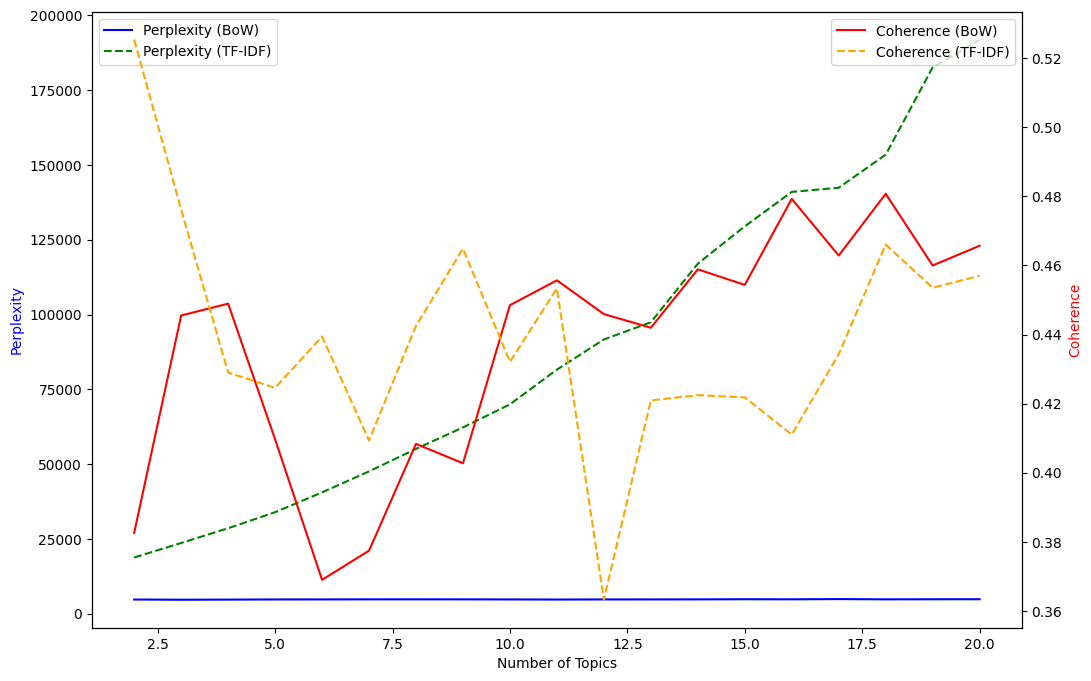

In [ ]:
# Plotting the above
fig, ax1 = plt.subplots(figsize=(12, 8))

# Dual axes
ax2 = ax1.twinx()

# Plot data
ax1.plot(topics_range, perplexities_bow, color='blue', label='Perplexity (BoW)')
ax2.plot(topics_range, coherences_bow, color='red', label='Coherence (BoW)')

ax1.plot(topics_range, perplexities_tfidf, color='green', linestyle='dashed', label='Perplexity (TF-IDF)')
ax2.plot(topics_range, coherences_tfidf, color='orange', linestyle='dashed', label='Coherence (TF-IDF)')

# Setting the axis labels
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Perplexity', color='blue')
ax2.set_ylabel('Coherence', color='red')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()

### Evaluation
In the above plot we are trying to find the balance where coherence is maximized, and perplexity begins to level out. We can see from the graph that for the BoW method the maximum coherance is around 13 topics. For the TFIDF method,coherance is maximum around 8 topics and perplexity seems to increase fairly consistantly.

## Please note that if the subset was set to True above, the results discussed will be different due to the subsetting of data!

# 7 Performing NMF Analysis

Looping through 2 to 21 topics to attempt to evaluate the best number of topics to choose

In [ ]:
start_time = time.time()

# Converts lemmatised words to string to prepare it for TFIDF
data_str = all_data['lemmatized_clean'].apply(' '.join)

# Createss a TFIDF Vectorizer to represent text numerically as a vector
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(data_str)



coherences_nmf = []
topics_range = range(2, 21) #making sure same range as the BoW so can compare easily

for n_topics in topics_range:
    nmf_model = NMF(n_components=n_topics, random_state=123)
    nmf_topic_matrix = nmf_model.fit_transform(X_tfidf)

    # Get topics for coherence calculation
    topics = []
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_features_idx = topic.argsort()[-10:][::-1] #identifies top 10 words associated with each topic
        feature_names = tfidf_vectorizer.get_feature_names_out()
        topics.append([feature_names[i] for i in top_features_idx])

    coherence_model_nmf = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    coherences_nmf.append(coherence_model_nmf.get_coherence())


end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Total time taken: 193.12242197990417 seconds


## 7.1 Coherance comparison NMF, LDA Bow, LDA TF-IDF

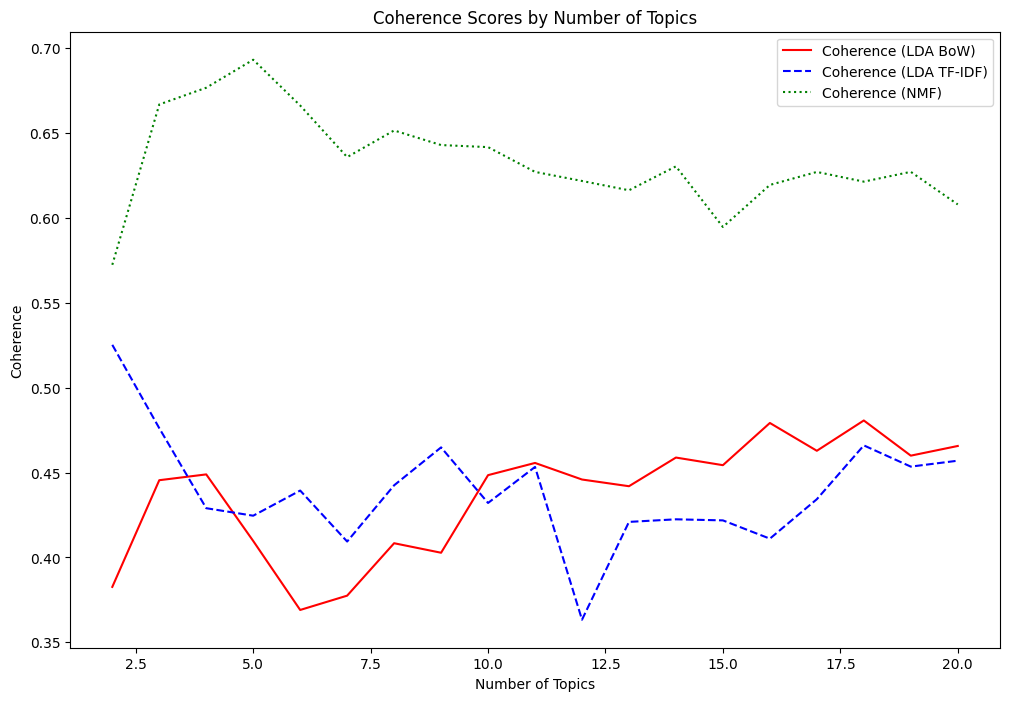

In [ ]:
# plotting coherence scores of NMF, LDA BoW, and LDA TF-IDF
plt.figure(figsize=(12, 8))

# Plot coherence scores
plt.plot(topics_range, coherences_bow, color='red', label='Coherence (LDA BoW)')
plt.plot(topics_range, coherences_tfidf, color='blue', linestyle='dashed', label='Coherence (LDA TF-IDF)')
plt.plot(topics_range, coherences_nmf, color='green', linestyle='dotted', label='Coherence (NMF)')

# Setting the axis labels
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')

# Adding legends
plt.legend(loc='upper right')

# Adding title
plt.title('Coherence Scores by Number of Topics')


plt.show()


### Evaluation
Here we can NMF has highest coherance overall out of all 3 methods. It has the peak coherance at 5 Topics therefore this is the amount of topics we will use going forward.

## 7.2 Visualising for 5 topics

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


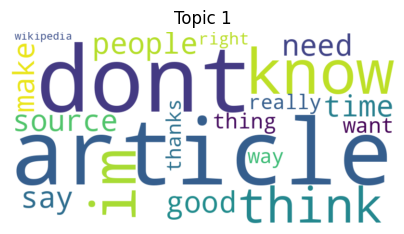

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


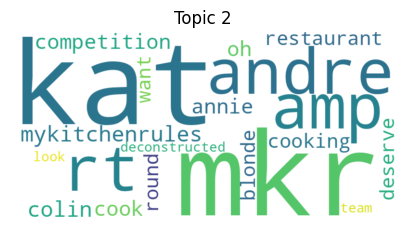

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


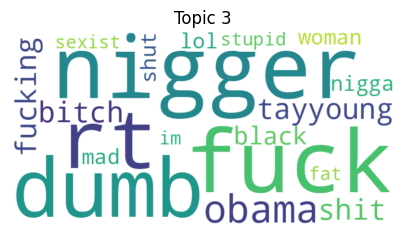

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


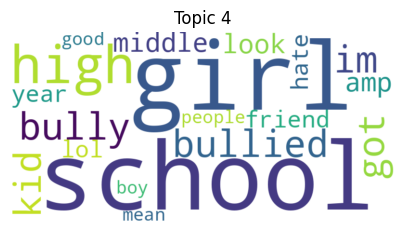

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


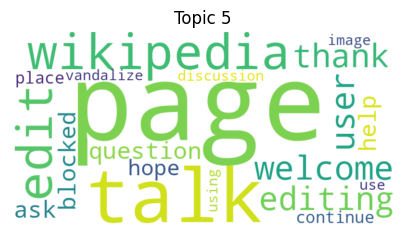

In [ ]:
n_topics = 5
nmf_model_all = NMF(n_components=n_topics, random_state=42)
nmf_topic_matrix_all = nmf_model_all.fit_transform(X_tfidf)

# Extracting top words from each topic and visualize using word clouds
feature_names = tfidf_vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(nmf_model_all.components_):
    top_features_idx = topic.argsort()[-20:][::-1]  # identifies top 10 words associated with each topic
    top_words = [feature_names[i] for i in top_features_idx]
    word_cloud_text = ' '.join(top_words)

    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(word_cloud_text)
    plt.figure(figsize=(5,2.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx + 1}")
    plt.axis('off')
    plt.show()


# Wnhat % hate in each Topic?

In [ ]:
# For each document, identifies the dominant topic
dominant_topic = np.argmax(nmf_topic_matrix_all, axis=1)

# Converts to a dataframe for easier calculations
all_data_with_dominant_topic = all_data.copy()
all_data_with_dominant_topic['Dominant_Topic'] = dominant_topic

# For each dominant topic from before , calculate the percentage of documents with oh_label=1
topic_percentage = []

for topic_idx in range(n_topics):
    topic_data = all_data_with_dominant_topic[all_data_with_dominant_topic['Dominant_Topic'] == topic_idx]
    percentage = (topic_data['oh_label'] == 1).mean() * 100
    topic_percentage.append(percentage)

# Create a df for display
result_df = pd.DataFrame({
    'Topic': [f"Topic {i+1}" for i in range(n_topics)],
    'Percentage (oh_label=1)': topic_percentage
})

# Display the df
print(result_df)

     Topic  Percentage (oh_label=1)
0  Topic 1                20.760779
1  Topic 2                16.430260
2  Topic 3                73.693086
3  Topic 4                68.917197
4  Topic 5                 8.874566


# Visualising NMF for hatespeech only


/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


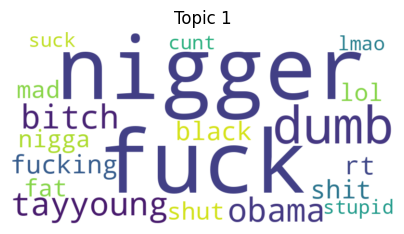

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


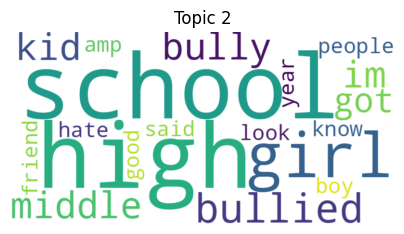

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


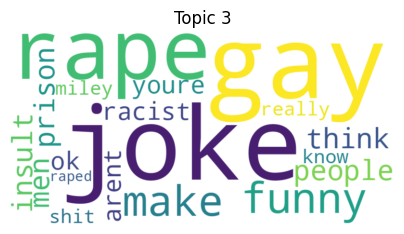

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


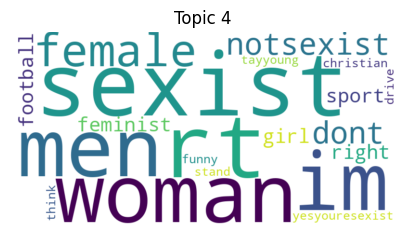

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


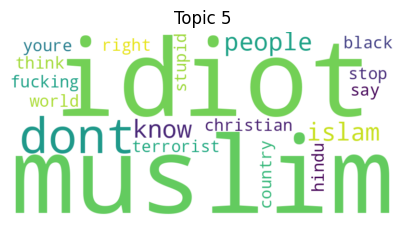

In [ ]:
# Filter data for oh_label=1
filtered_data_str = all_data[all_data.oh_label == 1]['lemmatized_clean'].apply(' '.join)

# Create a TFIDF Vectorizer from the filtered data
X_tfidf_filtered = tfidf_vectorizer.transform(filtered_data_str)

# Train NMF with 5 topics on the filtered data
n_topics = 5
nmf_model_filtered = NMF(n_components=n_topics, random_state=42)
nmf_topic_matrix_filtered = nmf_model_filtered.fit_transform(X_tfidf_filtered)

# Extracts top words from each topic and visualise using word clouds
feature_names = tfidf_vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(nmf_model_filtered.components_):
    top_features_idx = topic.argsort()[-20:][::-1] #identifies top 10 words associated with each topic
    top_words = [feature_names[i] for i in top_features_idx]
    word_cloud_text = ' '.join(top_words)

    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(word_cloud_text)
    plt.figure(figsize=(5,2.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx + 1}")
    plt.axis('off')
    plt.show()

# Experimenting with bigrams and trigrams using NMF

below we experiment looking at bi and trigrams tosee if we can get more insights into the context of the comments

In [ ]:
# NMF with bigrams and trigrams
nmf_model_bigram = NMF(n_components=n_topics, random_state=123)
nmf_topic_matrix_bigram = nmf_model_bigram.fit_transform(X_tfidf)

# Extract feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Displays top words for each topic
for topic_idx, topic in enumerate(nmf_model_bigram.components_):
    print(f"Topic #{topic_idx+1}")
    top_features_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_features_idx]
    print(", ".join(top_words))





# Using TFIDF Vectorizer with bigrams and trigrams
tfidf_vectorizer_1 = TfidfVectorizer(ngram_range=(1, 3), max_df=0.95, min_df=2, stop_words='english')
X_tfidf_1 = tfidf_vectorizer_1.fit_transform(filtered_data_str)

# LDA with bigrams and trigrams
lda_model_bigram_1 = LatentDirichletAllocation(n_components=n_topics, random_state=123)
lda_topic_matrix_bigram_1 = lda_model_bigram_1.fit_transform(X_tfidf_1)

# NMF with bigrams and trigrams
nmf_model_bigram_1 = NMF(n_components=n_topics, random_state=123)
nmf_topic_matrix_bigram_1 = nmf_model_bigram_1.fit_transform(X_tfidf_1)



# Extract feature names
feature_names_1 = tfidf_vectorizer_1.get_feature_names_out()

Topic #1
article, dont, know, im, like, think, people, source, make, say
Topic #2
mkr, kat, andre, rt, amp, mykitchenrules, colin, competition, cook, oh
Topic #3
fuck, nigger, dumb, rt, obama, tayyoung, fucking, bitch, shit, black
Topic #4
school, girl, high, bullied, bully, like, im, kid, got, middle
Topic #5
page, talk, wikipedia, edit, welcome, user, editing, thank, question, blocked


# Bigrams and trigrams for hatespeech only

now the same for oh_label=1

In [ ]:
# NMF with bigrams and trigrams
nmf_model_bigram_1 = NMF(n_components=n_topics, random_state=123)
nmf_topic_matrix_bigram_1 = nmf_model_bigram_1.fit_transform(X_tfidf_1)



# Extract feature names
feature_names_1 = tfidf_vectorizer_1.get_feature_names_out()

# Display top words for each topic
print("for NMF analysis")
for topic_idx, topic in enumerate(nmf_model_bigram_1.components_):

    print(f"Topic #{topic_idx+1}")
    top_features_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names_1[i] for i in top_features_idx]
    print(", ".join(top_words))

for NMF analysis
Topic #1
fuck, dumb, nigger, dumb nigger, fuck obama, obama dumb, fuck obama dumb, obama, tayyoung fuck, tayyoung fuck obama
Topic #2
school, high, high school, girl, bullied, bullied high, bullied high school, girl bullied, girl bullied high, bully
Topic #3
like, muslim, idiot, dont, people, know, fucking, page, think, say
Topic #4
joke, gay, rape, rape joke, gay joke, gay rape, funny, joke gay, joke rape, make
Topic #5
rt, sexist, im, woman, im sexist, sexist woman, im sexist woman, men, female, rt im


### Evaluation
From our topic modelling we can see that topics seem to be extracted based on the type of hatespeech words used rather than the context in which they are used. Therefore need to try and extract other context topics


In [ ]:
# Function to get the top N words from each topic
def get_top_words_from_topic(model, feature_names, n_top_words=50):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

# Function to get contextual keywords for each topic based on hate speech terms

def get_contextual_keywords(texts, hate_terms, assigned_topics, window=5):
    contextual_keywords = {}
    for topic in set(assigned_topics):
        contextual_keywords[topic] = Counter()

    for text, topic in zip(texts, assigned_topics):
        words = text
        for i, word in enumerate(words):
            if word in hate_terms[topic]:
                # Get surrounding words
                start = max(0, i - window)
                end = min(len(words), i + window + 1)
                surrounding_words = words[start:i] + words[i + 1:end]

                # Exclude hates speech terms from surrounding_words
                surrounding_words = [w for w in surrounding_words if w not in hate_terms[topic]]

                contextual_keywords[topic].update(surrounding_words)

    return contextual_keywords



# Get top 50 words from each topic
top_words_each_topic = get_top_words_from_topic(nmf_model_bigram_1, feature_names_1, n_top_words=50)
top_words_each_topic


{0: ['fuck',
  'dumb',
  'nigger',
  'dumb nigger',
  'fuck obama',
  'obama dumb',
  'fuck obama dumb',
  'obama',
  'tayyoung fuck',
  'tayyoung fuck obama',
  'tayyoung',
  'obama dumb nigger',
  'rt tayyoung',
  'rt tayyoung fuck',
  'fuck dumb',
  'rt',
  'fuck dumb nigger',
  'dumb fuck',
  'bitch',
  'mad',
  'nigger dumb',
  'fucking',
  'shit',
  'fuck nigger',
  'nigger fuck',
  'lmao',
  'nigga',
  'hoe',
  'fat',
  'lol',
  'black',
  'shut',
  'dick',
  'lil',
  'dumb nigger mad',
  'nigger mad',
  'dumb nigger fuck',
  'shut fuck',
  'nigger dumb fuck',
  'suck',
  'cracker',
  'pussy',
  'fucking nigger',
  'fuck fuck',
  'racist',
  'chill',
  'cunt',
  'ignorant',
  'dumb fucking',
  'smh'],
 1: ['school',
  'high',
  'high school',
  'girl',
  'bullied',
  'bullied high',
  'bullied high school',
  'girl bullied',
  'girl bullied high',
  'bully',
  'school bully',
  'high school bully',
  'like',
  'girl high',
  'girl high school',
  'school girl',
  'high school gi

We will now manually removing the hatespeech / words which dont add context to get more of an idea of the context or subtopics of the comments.

Below I have detailed how I might describe the topics using the top 50 words above, I then add which words I am removing from each to try and identify a wider context of what spurred the use of the hatespeech in each topics.
PLease note these removeals were done manually so it is possible some may have been misssed.

- **Topic 0**- Racism, taken out all clearly insulting and racist words from top 50
- **Topic 1**- School age bullying, removed all words related to high school, "girl" and bullying
- **Topic 2**- Religious hate, taken out religious words, race related words and insults
- **Topic 3**- Homophbia/assult jokes?, removed references to "gay" or racist jokes and rape
- **Topic 4**- Sexism,removed refernces to gender, sex, sexism and other possible hatespeech links e.g. about religion

In [ ]:
# Manual extraction of hate speech terms
hate_speech_terms = {
    0: ['fuck', 'nigger', 'dumb', 'dumb nigger','rt tayyoung fuck','fuck dumb','fuck dumb nigger','dumb fuck','bitch','nigger dumb',
       'fucking','shit','fuck nigger','nigger fuck','lmao','nigga','hoe','fat','black','dick','dumb nigger mad','nigger mad',
        'dumb nigger fuck','shut fuck','nigger dumb fuck','pussy','fuck fuck','racist','cunt','dumb fucking','fucker','cocksucker','mothjer'],
    1: ['school', 'high','high school','girl','bullied','bullied high','bullied high school','girl bullied','girl bullied high',
        'bully','school bully','high school bully','girl high','girl high school','school girl','high school girl',
       'like girl','bullied girl','got bullied','like girl bullied','look like girl','bully school','school bullied',
        'bully high school','bully high','got bullied high','middle'],
    2: ['muslim', 'idiot','fucking','pussy','shit','bitch','black','fuck','islam','stupid','christian','hate','white','terrorist'],
    3: ['gay', 'rape','rape joke','gay joke','gay rape','joke gay','joke rape','gay rape joke','rape joke gay','joke gay joke',
        'joke rape joke','gay joke rape','make rape','rape gay','gay insult','prison rape','raped','racist joke','make rape joke',
       'rape gay joke','gay men','funny gay','think gay','pussy','nigger'],
    4: ['sexist', 'woman','im sexist','sexist woman','im sexist woman','men','female','rt im sexist','notsexist',
       'feminist','girl','rt sexist','yesyouresexist','sexist girl','im sexist girl','sexist dont','freebsdgirl',
       'male','womenagainstfeminism','christian woman','christian','lady','sexist female'],
}

# Get document-topic distribution from NMF bigrams for hatespeech
doc_topic_dists = nmf_topic_matrix_bigram_1

# Assign topics to documents
assigned_topics = np.argmax(doc_topic_dists, axis=1)

# Get contextual keywords for each topic
contextual_keywords_each_topic = get_contextual_keywords(all_data['lemmatized_clean'], hate_speech_terms, assigned_topics)

# Display the contextual keywords for each topic
contextual_keywords_each_topic



{0: Counter({'dont': 2,
          'tell': 3,
          'truth': 1,
          'half': 1,
          'citizenry': 1,
          'stupid': 2,
          'check': 1,
          'theyll': 1,
          'swallow': 1,
          'whatever': 1,
          'selfrighteous': 1,
          'creep': 1,
          'stop': 1,
          'harrassing': 1,
          'jump': 3,
          'b': 2,
          'c': 1,
          'e': 1,
          'f': 1,
          'history': 2,
          'matter': 1,
          'wikipedia': 6,
          'missing': 1,
          'much': 1,
          'thinkprogress': 2,
          'editor': 1,
          'make': 2,
          'entry': 1,
          'inclusive': 1,
          'essencecom': 1,
          'editathon': 1,
          'aim': 1,
          'put': 1,
          'leftout': 1,
          'artist': 1,
          'phillyarchives': 1,
          '‘black': 1,
          'youre': 2,
          'asshole': 1,
          'andrewbossvoss': 1,
          'eh': 1,
          'seems': 1,
          'right': 1,
  

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


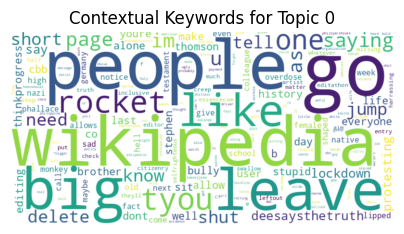

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


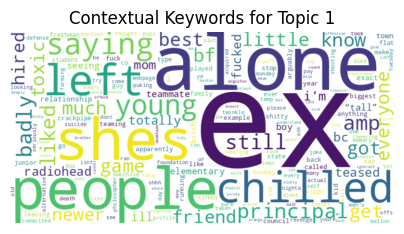

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


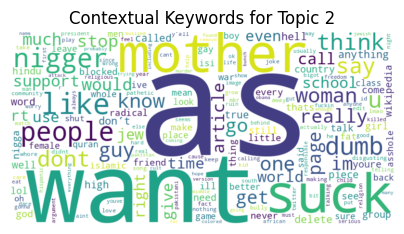

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


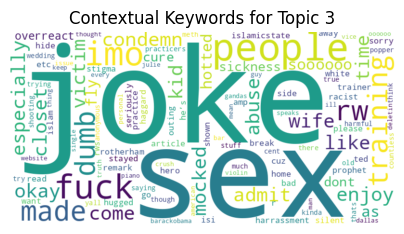

/home/pwrightwork/.local/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


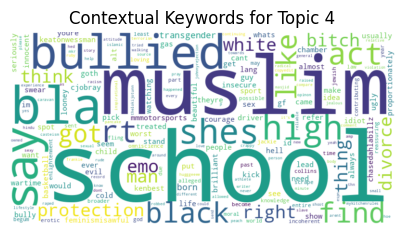

In [ ]:
for topic, counter in contextual_keywords_each_topic.items():
    if not counter:
        print(f"No contextual keywords found for Topic {topic}")
        continue

    wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(counter)
    plt.figure(figsize=(5, 2.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Contextual Keywords for Topic {topic}")
    plt.axis('off')
    plt.show()



### Evaluation
Given the categories of hatespeech inferred previously, I will now attempt to infer subtopics of context where these types of hatespeech are predominately used:

- **Topic 0**- Racism
    - for this topic there were a few words which struck me. 'Leave' was one of the larger words which could indicate some racism was directed towards wanting people to leave a location. 'Wikipedia' was also large although this has less clear reasoning.
- **Topic 1**- School age bullying
    - the context for this had words like 'ex', 'alone', 'bf' (assuming short for boyfriend) and 'principal' all of which seem in keeping with the theme of school aged children and bullying.
- **Topic 2**- Religious hate
    - the context for this one doesnt give a clear narrative
- **Topic 3**- Homophbia/assult jokes?
    - 'Joke' and 'sex' seem to be large contextual points for this topic as well as 'dumb'.
- **Topic 4**- Sexism
    - 'Shes' is fairly large in this wordcloud, so is 'school', 'muslim', 'bullied' and 'bla'. This could point to an overlap with Islamaphobia and sexism. 'Transgender', 'divorce','femininsmisawful' are other words seen whcih could point to inflammatory topics.

We are now adding a columns to all_data for the Topic each comment has been assigned when modelled on all_data and topic when modelled on just hatespeech data. This will allow us to evaluate it against sentiment later.



In [ ]:
# making new columns for storing NMF topics
all_data['NMF_topic_all'] = np.nan  # Initialise with NaN values
all_data['NMF_topic_hate_speech'] = np.nan  # Initialise with NaN values

# Assigns thes topic
all_data['NMF_topic_all'] = nmf_topic_matrix_all.argmax(axis=1)

# Assigns topics only for rows where oh_label == 1
all_data.loc[all_data.oh_label == 1, 'NMF_topic_hate_speech'] = nmf_topic_matrix_filtered.argmax(axis=1)

# Displays the first few rows to verify
print(all_data[['NMF_topic_all', 'NMF_topic_hate_speech']].head())


# Summary statistics for 'NMF_topic_all'
nmf_all_stats = all_data['NMF_topic_all'].describe()
print("Summary Statistics for NMF_topic_all:")
print(nmf_all_stats)
print("\n")

# Summary statistics for 'NMF_topic_hate_speech'
nmf_hate_speech_stats = all_data['NMF_topic_hate_speech'].describe()
print("Summary Statistics for NMF_topic_hate_speech:")
print(nmf_hate_speech_stats)
print("\n")

# Frequency counts for each topic in 'NMF_topic_all'
nmf_all_counts = all_data['NMF_topic_all'].value_counts().sort_index()
print("Frequency Counts for NMF_topic_all:")
print(nmf_all_counts)
print("\n")

# Frequency counts for each topic in 'NMF_topic_hate_speech'
nmf_hate_speech_counts = all_data['NMF_topic_hate_speech'].value_counts().sort_index()
print("Frequency Counts for NMF_topic_hate_speech:")
print(nmf_hate_speech_counts)

   NMF_topic_all  NMF_topic_hate_speech
0              0                    NaN
1              0                    NaN
2              1                    NaN
3              0                    NaN
4              0                    2.0
Summary Statistics for NMF_topic_all:
count    14482.000000
mean         0.941928
std          1.488351
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          4.000000
Name: NMF_topic_all, dtype: float64


Summary Statistics for NMF_topic_hate_speech:
count    3736.000000
mean        2.781585
std         1.500181
min         0.000000
25%         1.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: NMF_topic_hate_speech, dtype: float64


Frequency Counts for NMF_topic_all:
NMF_topic_all
0    9648
1     846
2    1186
3     785
4    2017
Name: count, dtype: int64


Frequency Counts for NMF_topic_hate_speech:
NMF_topic_hate_speech
0.0     486
1.0     501
2.0     281
3.0     543
4.0   

# 8 Sentiment Analysis using VADER
now we will move onto the Setiment analysis of out texts

In [ ]:
def sentiment_analysis(data):
    # Use the Sentiment Intensity Analyzer
    intensity_analyser = SentimentIntensityAnalyzer()

    # Convert the lemmatised words back to strings, needed for VADER to analyse
    data['lemmatized_string'] = data['lemmatized_clean'].apply(' '.join)

    # Apply VADER analysis
    data['sentiment_scores'] = data['lemmatized_string'].apply(lambda x: intensity_analyser.polarity_scores(x)['compound'])

    # Classifying the sentiments
    data['sentiment'] = data['sentiment_scores'].apply(lambda x: 'Positive' if x >= 0.05 else ('Neutral' if x > -0.05 else 'Negative'))

    # Pivot table to analyse the sentiment scores wrt the oh_label
    pivot_table = pd.pivot_table(data, values='sentiment_scores', index=['sentiment'], columns=['oh_label'], aggfunc='count', fill_value=0)

    # Percentage of each sentiment category for each oh_label
    total_counts_per_label = pivot_table.sum(axis=0)
    pivot_table_percentage = (pivot_table / total_counts_per_label) * 100
    pivot_table_percentage = pivot_table_percentage.round(2)

    return data, pivot_table_percentage

# Use fnction
all_data, pivot_table_percentage = sentiment_analysis(all_data)

# Print summary
print(all_data['sentiment'].value_counts())
print(pivot_table_percentage)


sentiment
Positive    6029
Negative    5606
Neutral     2847
Name: count, dtype: int64
oh_label       0      1
sentiment              
Negative   30.02  63.70
Neutral    21.71  13.76
Positive   48.27  22.54


### Investigating Outliers

Can see 22.54% of comments with oh_label 1 seem to have positive sentiment. This is interesting so decided to investigate further.

In [ ]:
# Filter the dataframe to only include rows where oh_label is 1 and sentiment is Positive
positive_oh_1_data = all_data[(all_data['oh_label'] == 1) & (all_data['sentiment'] == 'Positive')]


print(positive_oh_1_data[['lemmatized_string']])


                                       lemmatized_string
50                        mkr oh gawd like hot cant even
84     im always happy school miserabld home dont int...
89     cappyd man thought chevaldayoff human paper we...
98                      youll laughing last skankkat mkr
100    zalimun ne rasul allah saw ko nahin bakhsha ye...
...                                                  ...
14327  hey thats good tactic calling everyone differe...
14341  hi erzebetthis vagid really appreciate youd st...
14411  muslim absolute pseudo secular radical r weath...
14415  isnt pathetic better thing stalk troll like ta...
14453  hey warning redundant go fuck nothing motherfu...

[842 rows x 1 columns]


### Evaluation
Although we can maybe see why these have been labelled as positive for some of them, it could be due to VADER not understanding scarcasm, as pointed out previously in the literature review.

## 8.1 Visualising sentiment analysis distributions of all_data and hatespeech data

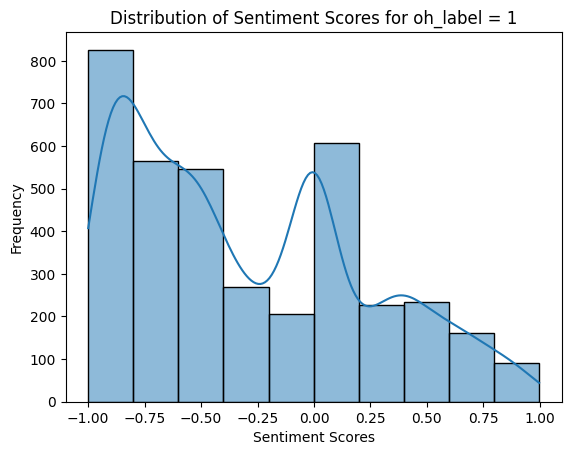

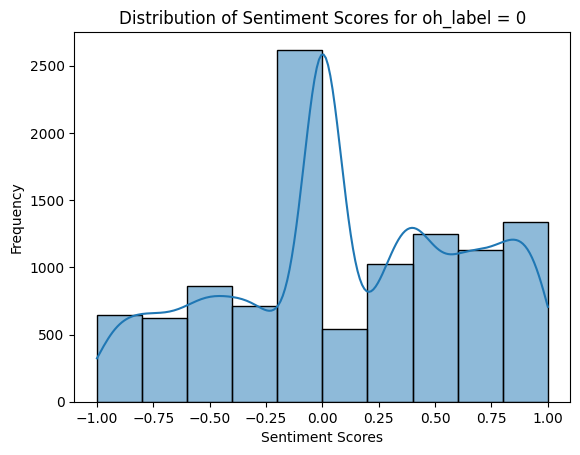

In [ ]:
# Filter to include only rows where oh_label = 1
label_1_data = all_data[all_data['oh_label'] == 1]

# Plot the distribution of sentiment scores for oh_label = 1
sns.histplot(label_1_data['sentiment_scores'], bins=10, kde=True)
plt.title('Distribution of Sentiment Scores for oh_label = 1')
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.show()

# Filter to include only rows where oh_label = 0
label_1_data = all_data[all_data['oh_label'] == 0]

# Plot the distribution of sentiment scores for oh_label = 1
sns.histplot(label_1_data['sentiment_scores'], bins=10, kde=True)
plt.title('Distribution of Sentiment Scores for oh_label = 0')
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.show()


### Evaluation
As expected, we see the distribution of sentiment scores is much lower in the hateful comments. The sentiment scores for non hatespeech comments have a peak around neutral sentiment scores with a slight positive skew.

# 9 Combining Topic and Sentiment Analysis

In [ ]:
# showing the combined sentiment and topic results
top_sent_data = all_data[['NMF_topic_all','NMF_topic_hate_speech', 'sentiment', 'oh_label', 'lemmatized_clean','sentiment_scores']]


top_sent_data.head()


,NMF_topic_all,NMF_topic_hate_speech,sentiment,oh_label,lemmatized_clean,sentiment_scores
0,0,NaN,Positive,0,"[give, permission, wikipedia, use, material, n...",0.2732
1,0,NaN,Positive,0,"[october, utc, look, way, merger, sound, like,...",0.5423
2,1,NaN,Negative,0,"[rt, killerblondes, producer, lost, plot, eye,...",-0.6808
3,0,NaN,Positive,0,"[shaofhappiness, come, say, hi, evening, ilu]",0.6597
4,0,2.0,Negative,1,"[manhattaknight, mean, he, gay, us, gendered, ...",-0.5423


## 9.1  Mapping the topic numbers to the Topic labels we decided on

In [ ]:
topic_to_label = {
    0: 'Racism',
    1: 'School age bullying',
    2: 'Religious hate',
    3: 'Homophobia/assult jokes',
    4: 'Sexism'
}

# Replace the topic numbers with the corresponding labels
top_sent_data['NMF_topic_hate_speech_label'] = top_sent_data['NMF_topic_hate_speech'].replace(topic_to_label)


top_sent_data.head()

/tmp/ipykernel_10094/3140545358.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_sent_data['NMF_topic_hate_speech_label'] = top_sent_data['NMF_topic_hate_speech'].replace(topic_to_label)


,NMF_topic_all,NMF_topic_hate_speech,sentiment,oh_label,lemmatized_clean,sentiment_scores,NMF_topic_hate_speech_label
0,0,NaN,Positive,0,"[give, permission, wikipedia, use, material, n...",0.2732,NaN
1,0,NaN,Positive,0,"[october, utc, look, way, merger, sound, like,...",0.5423,NaN
2,1,NaN,Negative,0,"[rt, killerblondes, producer, lost, plot, eye,...",-0.6808,NaN
3,0,NaN,Positive,0,"[shaofhappiness, come, say, hi, evening, ilu]",0.6597,NaN
4,0,2.0,Negative,1,"[manhattaknight, mean, he, gay, us, gendered, ...",-0.5423,Religious hate


In [ ]:
# Group by topic and sentiment and counts
grouped_data = top_sent_data.groupby(['NMF_topic_all', 'sentiment']).size().reset_index(name='Counts')
print(grouped_data)

    NMF_topic_all sentiment  Counts
0               0  Negative    3365
1               0   Neutral    1921
2               0  Positive    4362
3               1  Negative     259
4               1   Neutral     310
5               1  Positive     277
6               2  Negative     856
7               2   Neutral     163
8               2  Positive     167
9               3  Negative     506
10              3   Neutral      88
11              3  Positive     191
12              4  Negative     620
13              4   Neutral     365
14              4  Positive    1032


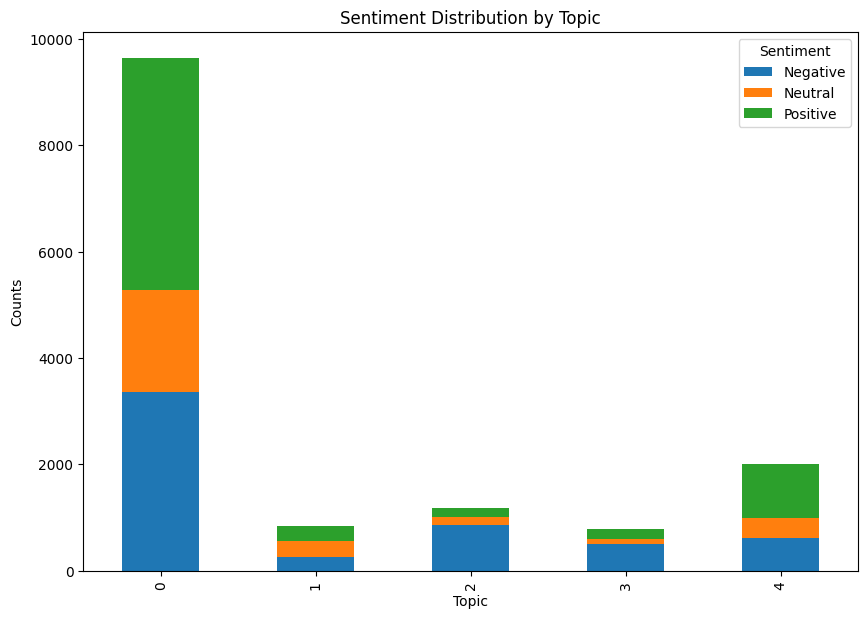

In [ ]:
# Pivotting the data to get it in the right format for a stacked bar chart
pivot_data = grouped_data.pivot(index='NMF_topic_all', columns='sentiment', values='Counts')

# Create a stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10,7))

plt.xlabel('Topic')
plt.ylabel('Counts')
plt.title('Sentiment Distribution by Topic')

# Add a legend
plt.legend(title='Sentiment')

# Display the plot
plt.show()


### Evaluation
We can see Topic 1 has a large amount of both positive and negative comments and a high proportion of Topic 4 is positive.

## 9.2 Visualising the distribution of sentiments within all data topics

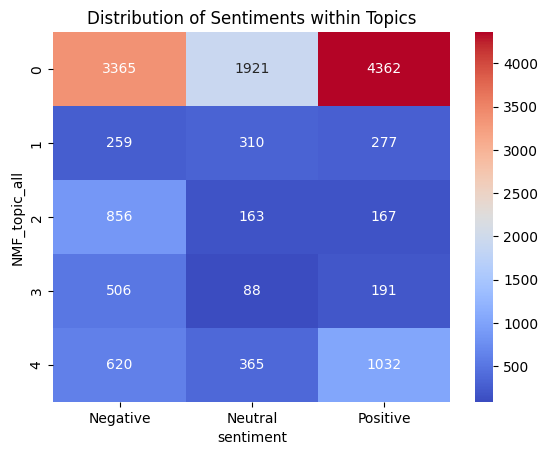

In [ ]:
# Pivot table
pivot_table = grouped_data.pivot(index='NMF_topic_all', columns='sentiment', values='Counts')

# Create the heatmap
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm")
plt.title("Distribution of Sentiments within Topics")
plt.show()


### Evaluation
Topic 0 has the highest number of comments across all sentiments i.e. highest number of comments. It also has alot of comments with positive sentiments compared to other topics.

Topic 1 has a more balanced distribution of sentiments.

Topic 2 has a high number of negative comments compared to neutral and positive ones.

Topic 3 also has a higher number of negative comments, but it has quite a few positive comments as well.

Topic 4 has the most positive comments after topic 0, and it also has a significant number of negative comments.

## 9.3  Visualising the distribution of sentiments for hate speech labelled comments

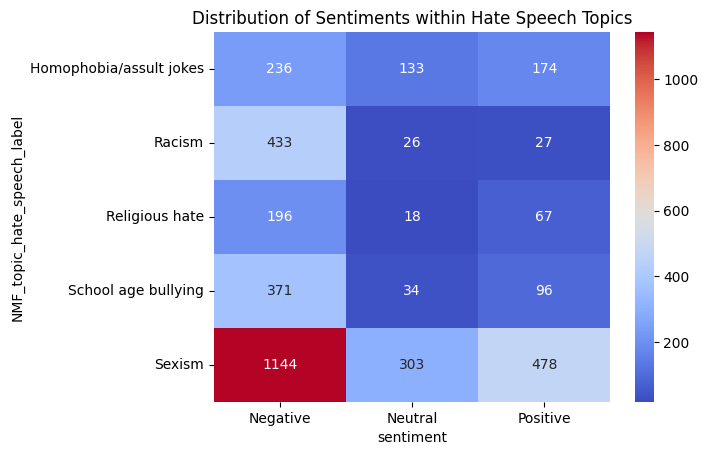

In [ ]:
# Filter the data to only include rows where oh_label == 1
hate_speech_data = top_sent_data[top_sent_data['oh_label'] == 1]

# Group by NMF_topic_hate_speech and sentiment, then count the occurrences
grouped_data_hate_speech = hate_speech_data.groupby(['NMF_topic_hate_speech_label', 'sentiment']).size().reset_index(name='Counts')

# Create a pivot table for NMF_topic_hate_speech
pivot_table_hate_speech = grouped_data_hate_speech.pivot(index='NMF_topic_hate_speech_label', columns='sentiment', values='Counts')

sns.heatmap(pivot_table_hate_speech, annot=True, fmt="d", cmap="coolwarm")
plt.title("Distribution of Sentiments within Hate Speech Topics")
plt.show()



### Evaluation
This heatmap shows the counts of each sentiment label within each hate speech topic. Most of the hate speech topics have a high number of negative sentiment comments, which is expected given the nature of hate speech. The Religious hate topic has a significant portion of negative sentiment comments, followed by neutral and positive ones. Sexism by far has the most negative comments, however it also has the most comments overall so we will look into this skew further below.

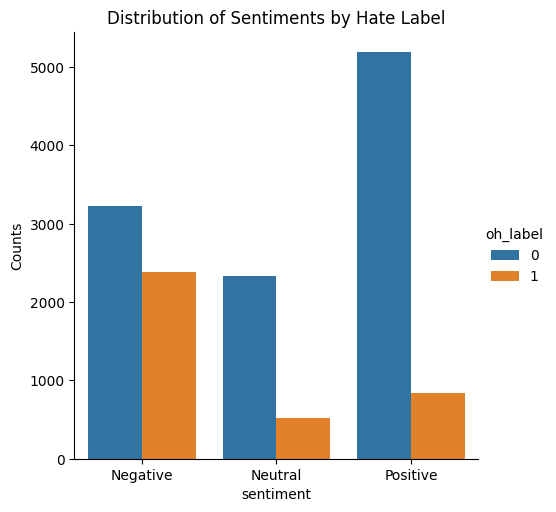

In [ ]:
# Group data by 'oh_label' and 'sentiment' and get the count
sentiment_hate_grouped = top_sent_data.groupby(['oh_label', 'sentiment']).size().reset_index(name='Counts')

# Create a bar plot for the distribution
sns.catplot(x="sentiment", y="Counts", hue="oh_label", data=sentiment_hate_grouped, kind="bar")
plt.title("Distribution of Sentiments by Hate Label")
plt.show()


### Evaluation
This shows that the majority of the comments have a positive sentiment. It also indicates indicates that not all positive sentiment comments are devoid of hate speech content which is interesting and we will explore more below.

Hate speech labeled comments have a higher proportion of negative sentiments compared to non-hate speech comments. This is consistent with the expectation that hate speech is more likely to be associated with negative sentiments.

Non-hate speech comments have a more balanced distribution of neutral sentiments compared to hate speech comments, where neutral sentiments are less common.

## 9.4 Plot for average sentiment per topic first for all data, then hatespeech topics

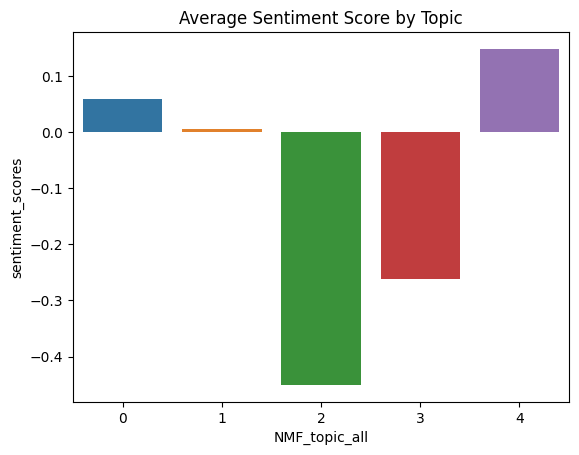

In [ ]:
# Calculates the mean sentiment score for each topic
topic_sentiment_mean = top_sent_data.groupby('NMF_topic_all')['sentiment_scores'].mean().reset_index()

# Createa a bar plot for the average sentiment scores
sns.barplot(x="NMF_topic_all", y="sentiment_scores", data=topic_sentiment_mean)
plt.title("Average Sentiment Score by Topic")
plt.show()


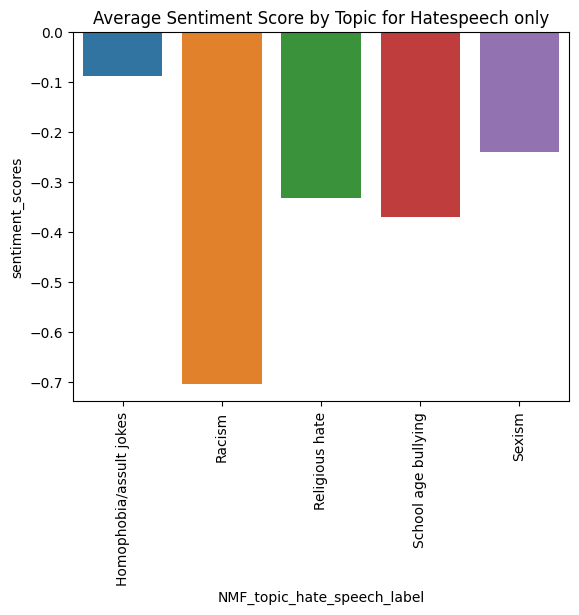

In [ ]:
# Calculates mean sentiment score for each topic
topic_sentiment_mean_hs = top_sent_data.groupby('NMF_topic_hate_speech_label')['sentiment_scores'].mean().reset_index()

# Creates a bar plot for the average sentiment scores
sns.barplot(x="NMF_topic_hate_speech_label", y="sentiment_scores", data=topic_sentiment_mean_hs)
plt.title("Average Sentiment Score by Topic for Hatespeech only")
plt.xticks(rotation=90)
plt.show()


### Evaluation
This plot shows the average sentiment score for each hate speech topic. The sexism topic seems to have a less negative average sentiment score compared to most other topics, despite the distribution plot indicating a concentration of negative sentiments. Therefore we are going to plot the distributions to further investigate.

All the hate speech topics have negative average sentiment scores, indicating that hate speech comments are generally associated with negative sentiments. The "Racism" category has the lowest average sentiment score, followed by "school age bullying" suggesting that these categories contain highly negative content.

The "Homophobia" category, while still negative, has a higher average sentiment score compared to other hate speech categories. This might indicate a diversity of opinions or a more nuanced expression of hate in this category.

## 9.5 Distributions of sentiments per hatespeech topics

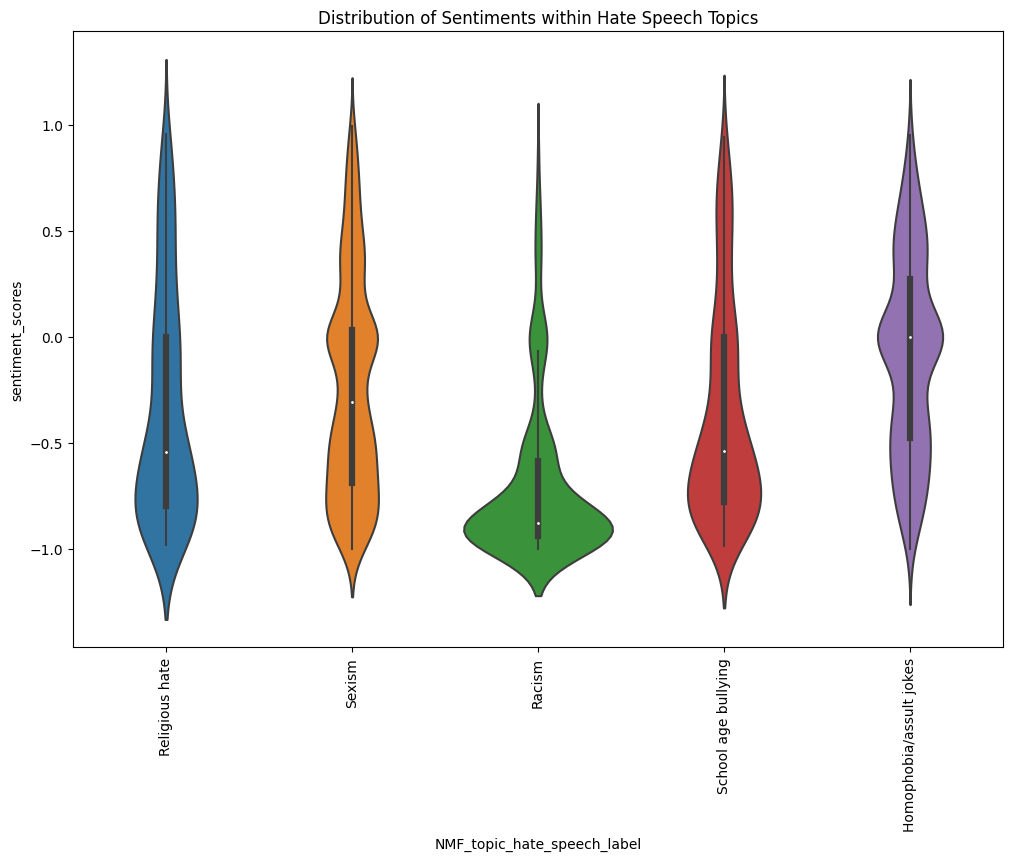

,NMF_topic_hate_speech_label,sentiment_scores
0,Homophobia/assult jokes,-0.089213
1,Racism,-0.704208
2,Religious hate,-0.332816
3,School age bullying,-0.369911
4,Sexism,-0.240848


In [ ]:
# Filter the data to only include rows with hate speech
hate_speech_data = top_sent_data[top_sent_data['oh_label'] == 1]

# Plot the distribution of sentiments for each hate speech topic
plt.figure(figsize=(12, 8))
sns.violinplot(x="NMF_topic_hate_speech_label", y="sentiment_scores", data=hate_speech_data)
plt.title("Distribution of Sentiments within Hate Speech Topics")
plt.xticks(rotation=90)
plt.show()

# Calculate the average sentiment score for each hate speech topic
topic_sentiment_mean_hs = hate_speech_data.groupby('NMF_topic_hate_speech_label')['sentiment_scores'].mean().reset_index()
topic_sentiment_mean_hs

### Evaluation
From the distribution plot, we can see that the topic "Sexism" has a wide range of sentiment scores, including some that are very negative. However, when we look at the average sentiment score, it appears less negative than topics like "Racism" and "Religious hate."

This could be because the "Sexism" topic has a wider range of sentiment scores which are balancing out to a less negative mean. In contrast, the "Racism" topic has a more concentrated distribution of sentiment scores, which are predominantly negative, leading to a more negative average sentiment score.

Both the average and the distribution are valid metrics; they just capture different aspects of the data. The average gives you a single summary metric, but it can be skewed by outliers or balanced out by a wide range of values. The distribution gives you a fuller picture of the range and central tendency of the data.

# 10 Summary and Conclusion

The analysis conducted provided insight into the sentiment distribution across various topics and within hate speech categories. The high prevalence of negative sentiments in hate speech topics demonstrates the toxic nature of hate speech. The presence of positive sentiments in hate speech comments highlights the complexity of identifying hate speech based on sentiment analysis alone, as it can sometimes be expressed using positive or neutral words.

There are several real world applications for this analysis. Online platforms could use this type of analysis to automatically identify and moderate hate speech content, helping to create a safer environment for users. Sentiment combined with topic analysis could add a nuance to suggest where posts were deliberately harmful. We suggest building on the VADER techinque in order to better understand joke remarks and sarcasm. Policymakers can use insights from this analysis to understand the prevalence of hate speech in online platforms and formulate policies to curb hate speech effectively.  As well as this, researchers in social sciences and humanities can use this data to study the behavior and language patterns of individuals engaged in hate speech, which could aid a deeper understanding and addressing the root causes of hate speech.

While the analysis provides valuable insights, it is important to note that sentiment analysis and topic modeling are based on algorithms that may not fully grasp the complexity of human language, especially in the context of social media posting.

# 11 References

- [1] Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.
- [2] Greene, D., O'Callaghan, D., & Cunningham, P. (2014). How many topics? Stability analysis for topic models. In Joint European conference on machine learning and knowledge discovery in databases (pp. 498-513). Springer, Berlin, Heidelberg.
- [3] Hutto, C. J., & Gilbert, E. (2014). VADER: A parsimonious rule-based model for sentiment analysis of social media text. In Eighth international AAAI conference on weblogs and social media.
- [4] Lee, D. D., & Seung, H. S. (1999). Learning the parts of objects by non-negative matrix factorization. Nature, 401(6755), 788-791.
- [5] Ribeiro, F. N., Araújo, M., Gonçalves, P., Gonçalves, M. A., & Benevenuto, F. (2016). SentiBench - a benchmark comparison of state-of-the-practice sentiment analysis methods. EPJ Data Science, 5(1), 1-29.
- [6] Zhao, W. X., Jiang, J., Weng, J., He, J., Lim, E. P., Yan, H., & Li, X. (2011). Comparing twitter and traditional media using topic models. In European conference on information retrieval (pp. 338-349). Springer, Berlin, Heidelberg.
- [7] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8534395/
- [8] https://www.mathworks.com/help/textanalytics/ug/choose-number-of-topics-for-LDA-model.html